<h1>Assignment 5</h1>

# Task 2

['#Oslo', '#VisitOslo', '#scoon', '#norway', '#gifts', '#makingadifference', '#toys', '#teddybear', '#disabled', '#wheelchair', '#PWDs', '#donation', '#charity', '#prayer', '#shahidjamil', '#scoon', '#oslo', '#Oslo', '#Nordstrand', '#Oslo', '#Majorstuen', '#Oslo', '#Torshov', '#Oslo', '#Norway', '#Oslo', '#OsloSentrum', '#oslo', '#frognerparken', '#norway', '#street', '#heritage', '#montain', '#landscapes', '#architecture', '#arquitectura', '#arquitetura', '#landscape', '#visitnorway', '#visitoslo', '#wu_norway', '#norway_places', '#topnorwayphotos', '#norwaytravel', '#p3top', '#vsco', '#tourism', '#trip', '#oslo', '#arkershusfortress', '#norway', '#street', '#heritage', '#montain', '#landscapes', '#architecture', '#arquitectura', '#arquitetura', '#landscape', '#visitnorway', '#visitoslo', '#wu_norway', '#norway_places', '#topnorwayphotos', '#norwaytravel', '#p3top', '#vsco', '#tourism', '#trip', '#oslo', '#arkershusfortress', '#norway', '#street', '#heritage', '#montain', '#landscapes

c:\Users\flipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\flipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12449 (\N{KATAKANA LETTER SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\flipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\flipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\flipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\flipp\anaconda3\l

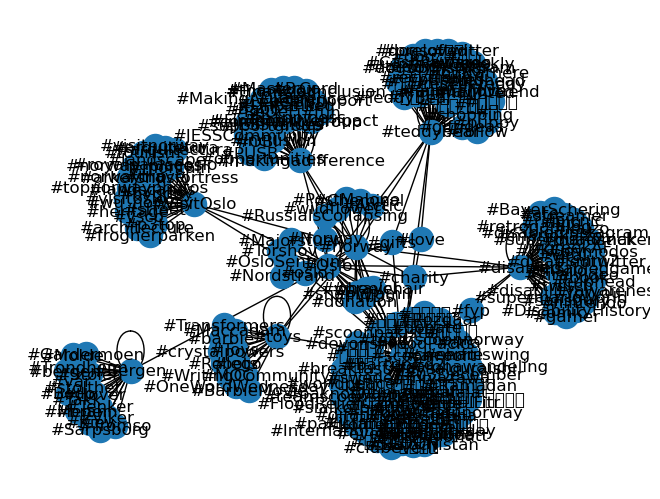

In [13]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
import re
import networkx as nx
import matplotlib.pyplot as plt
import time

def scrolldown():
    for i in range(30):
        ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
        time.sleep(.3)

def wait():
    WebDriverWait(driver, 40).until(
        EC.presence_of_all_elements_located(
            (By.XPATH, "//div[@class='css-1dbjc4n r-16y2uox r-1wbh5a2 r-1ny4l3l']")
        ))

nodes = []
edges = []

driver = webdriver.Chrome()
visited = set() # Set to store visited hashtags
to_do_list = []

def find_hashtag(hashtag):
    if hashtag in visited: # Check if hashtag is already visited
        return
    visited.add(hashtag)
    url = f'https://twitter.com/hashtag/{hashtag}?src=hashtag_click'
    driver.get(url)
    wait()
    scrolldown()

    bs = BeautifulSoup(driver.page_source, 'html.parser')
    hashtags = bs.find_all('a', {'href': re.compile('/hashtag/.*')})

    for link in hashtags:
        hashtag_text = link.get_text()
        if hashtag_text.startswith('#'):
            to_do_list.append(hashtag_text[1:])
            nodes.append(hashtag_text)
            edges.append((f'#{hashtag}', hashtag_text))


current_hashtag = "homepage"
count = 0
while count < 1:
    find_hashtag(current_hashtag)
    count += 1

current_hashtag = "Oslo"
count = 0
while count < 5:
    find_hashtag(current_hashtag)
    current_hashtag = to_do_list.pop(0)
    count += 1


current_hashtag = "Bergen"
count = 0
while count < 5:
    find_hashtag(current_hashtag)
    current_hashtag = to_do_list.pop(0)
    count += 1

print(nodes, edges)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
name = "network"


nx.write_graphml(G, f"{name}.graphml")
plt.show()

driver.quit()
